# Numerical Simulation Laboratory
## Exercise Sheet 06
### Exercise 06.1
We use the completed Monte Carlo code to estimate the functions $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties. The graphs show the results for $h = 0$ and for $h=0.02$, and with both Metropolis and Gibbs sampling. The obtained curves are compared with the known analytical results.

#### H = 0

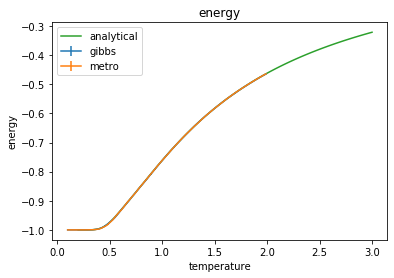

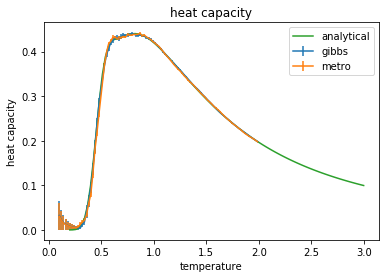

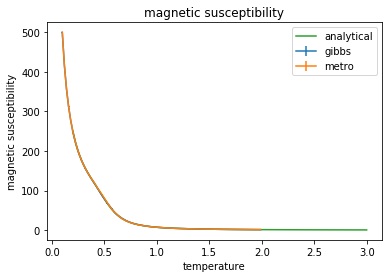

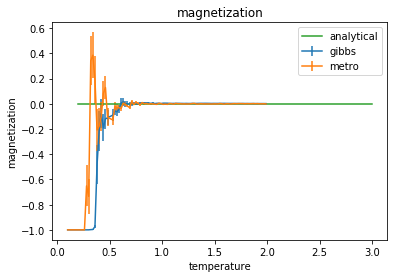

In [3]:
import numpy as np
import matplotlib.pyplot as plt
### analytical results
points=100; T = np.linspace(0.2,3.0,num=points)
beta = 1/T; J = 1.0; Ns = 50; th = np.tanh(J/T); thN= th**Ns; ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
mag = np.zeros(len(T))
### simulated data
temps = np.loadtxt('metro/h0/T.dat')
quants = ['ene', 'heat', 'chi', 'mag']
names = ['energy','heat capacity','magnetic susceptibility','magnetization']
anarr = [e, heat, X, mag]

for q in range(0,len(quants)):
    fig, ax = plt.subplots()
    for mode in ['gibbs','metro']:
        y = np.zeros(len(temps)); err = np.zeros(len(temps))
        for i in range(0,len(temps)):
            #print('h0/t'+str(temps[i])+'/output.'+quants[q]+'.0')
            usls, usls2, yread, eread = np.loadtxt(mode+'/h0/t'+str(temps[i])+'/output.'+quants[q]+'.0', unpack=True)
            y[i] = yread[-1]; err[i] = eread[-1]
        ax.errorbar(temps,y, yerr=err, label=mode)
    ax.plot(T,anarr[q], label='analytical')
    ax.set_xlabel('temperature')
    ax.set_ylabel(names[q])
    ax.set_title(names[q])
    ax.legend()



plt.show()

#### H = 0.02

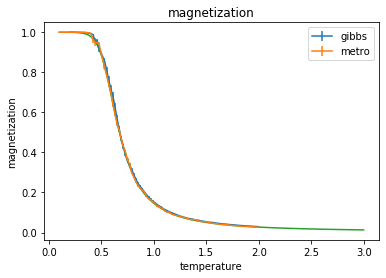

In [2]:
import numpy as np
import matplotlib.pyplot as plt
### analytical results
points=100; T = np.linspace(0.2,3.0,num=points)
beta = 1/T; J = 1.0; Ns = 50; 
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
### simulated data
temps = np.loadtxt('metro/h002/T.dat')
quants = ['mag']
names = ['magnetization']
anarr = [mag]

for q in range(0,len(quants)):
    fig, ax = plt.subplots()
    for mode in ['gibbs','metro']:
        y = np.zeros(len(temps)); err = np.zeros(len(temps))
        for i in range(0,len(temps)):
            usls, usls2, yread, eread = np.loadtxt(mode+'/h002/t'+str(temps[i])+'/output.'+quants[q]+'.0', unpack=True)
            y[i] = yread[-1]; err[i] = eread[-1]
        ax.errorbar(temps,y, yerr=err, label=mode)
    ax.plot(T,anarr[q])
    ax.set_xlabel('temperature')
    ax.set_ylabel(names[q])
    ax.set_title(names[q])
    ax.legend()



plt.show()

As we can see, the Monte Carlo simulation is accurate for the whole temperature range explored, with both Metropolis and Gibbs sampling. The only exception is when trying to compute the magnetization for low T and $h = 0$. In this case, the expected value of the magnetization is still zero, because the two opposite fully-magnetized states have equal probability, but the sampling becomes very inaccurate because of the very high energy barrier between them. 
As soon as we turn on even a very weak external field, the degeneration disappears, and the sampling resumes working correctly.